# **Vietnamese Sentiment Analysis**

Mô tả đồ án:   
- Sentiment Analysis hay còn gọi là Opinion Mining hoặc Emotion AI là bài toán sử dụng xử lý ngôn ngữ tự nhiên, phân tích văn bản, ngôn ngữ học máy tính, sinh trắc học để xác định, trích xuất, định lượng và nghiên cứu các trạng thái cảm xúc và thông tin chủ quan một cách có hệ thống. Sentiment Analysis được áp dụng rộng rãi cho các tài liệu tiếng nói của khách hàng như đánh giá và phản hồi khảo sát, phương tiện truyền thông xã hội và trực tuyến cũng như tài liệu chăm sóc sức khỏe cho các ứng dụng từ tiếp thị đến dịch vụ khách hàng đến y học lâm sàng.   
- Ở bài toán lần này nhóm thực hiện việc phân tích cảm xúc của các phản hồi bằng tiếng Việt của khách hàng đối với smartphone của các trang web thương mại về bán hàng điện tử ở Việt Nam.


## **Import Thư viện**

In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib.pyplot as plt

from tqdm import tqdm

#from underthesea import word_tokenize
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import cohen_kappa_score

from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import optimizers

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pickle
import seaborn as sns

from gensim.models import Word2Vec
import gensim.models.keyedvectors as word2vec

from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import load_model



## **Import, Tiền Xử Lý Data**

In [ ]:
!gdown 1dP2V8R4BEKzTWJKVVf7vnBVPGtVy7xoJ
!gdown 16rK0ouYI_RKU42mY0R7KHGktYUHlB8A4

Downloading...
From: https://drive.google.com/uc?id=1dP2V8R4BEKzTWJKVVf7vnBVPGtVy7xoJ
To: /content/train.csv
100% 548k/548k [00:00<00:00, 32.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=16rK0ouYI_RKU42mY0R7KHGktYUHlB8A4
To: /content/test.csv
100% 185k/185k [00:00<00:00, 90.1MB/s]


In [ ]:
data = pd.read_csv('train.csv')
data

,review,label
0,mua cho gia đình dùng được một tháng không th...,1
1,sài sim viettel sử dụng máy khác thì bình thườ...,0
2,"quá ổn áp, apple mà còn phải bàn nữa",1
3,máy như vậy thì sử dụng 1 thời gian nữa thì c...,0
4,"pin tụt nhanh quá, xài chưa được 1 ngày đã hết...",1
...,...,...
5995,pin dùng được cả ngày nha,1
5996,chơi game thì giật lag cho nên mọi người cân ...,0
5997,có thể dùng sim các mạng khác nhau khi di chuy...,1
5998,"nhân viên tư vấn tốt, vui vẻ, nhanh chóng",1


In [ ]:
reviews = data.review.tolist()
labels  = data.label.tolist()

In [ ]:
labels_data = data.label.tolist()

In [ ]:
len(labels_data)

6000

In [ ]:
test_data = pd.read_csv("test.csv")
test_data

,review,label
0,điện thoại rất đẹp và sang,1
1,trong tầm giá 5 triệu thì điện thoại này rất t...,1
2,hay là phan samsung vào phá,1
3,"cài rất nhiều ứng dụng có sẵn, khi tải 1 ứng d...",0
4,"pin khỏe dùng được lâu, máy cấu hình mạnh dùng...",1
...,...,...
1995,nhưng thôi hơn 100k thì cũng không tiếc,0
1996,nghe ngta chê đủ mua về được 2 tháng rồi máy d...,1
1997,pin bthg nhưng được cái sạc siêu nhanh luôn s...,1
1998,"máy tốt với tầm giá, sóng mạng di động và wifi...",1


In [ ]:
test_data_reviews = test_data.review.tolist()
test_data_labels = test_data.label.tolist()


## **TF-IDF**

In [ ]:
tf_idf = TfidfVectorizer(min_df=5,max_df= 0.8,max_features=3000,sublinear_tf=True)
tf_idf.fit(reviews)
X = tf_idf.transform(reviews)

### **LogisticRegression**

In [ ]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X,labels_data,test_size=0.25)
model = LogisticRegression()
model.fit(X_train1,Y_train1)
y_pre = model.predict(X_test1)
print(classification_report(Y_test1,y_pre))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       745
           1       0.88      0.82      0.85       755

    accuracy                           0.86      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500



### **Test model**

In [ ]:
X = tf_idf.transform(test_data_reviews)
y_pre = model.predict(X)
print(classification_report(test_data_labels,y_pre))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.88      0.83      0.85      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



##**Word2Vec**

In [ ]:
input_gensim = []
for review in reviews:
    input_gensim.append(str(review).split())
    
model1 = Word2Vec(input_gensim, size=128, window=5, min_count=0, workers=4, sg=1)
model1.wv.save("word.model")

(array([4.708e+03, 9.620e+02, 2.220e+02, 6.100e+01, 2.100e+01, 1.400e+01,
        5.000e+00, 2.000e+00, 2.000e+00, 3.000e+00]),
 array([  6. ,  19.3,  32.6,  45.9,  59.2,  72.5,  85.8,  99.1, 112.4,
        125.7, 139. ]),
 <a list of 10 Patch objects>)

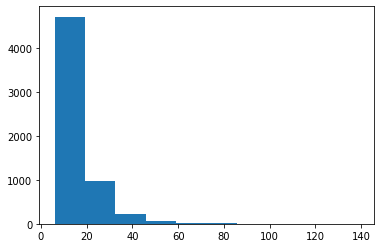

In [ ]:
#Kiểm tra số lượng của từ trong câu
seq_len=[len(input) for input in input_gensim]
plt.hist(seq_len,bins=10)

In [ ]:
model_embedding = word2vec.KeyedVectors.load('./word.model')

word_labels = []
max_seq = 100
embedding_size = 128

for word in model_embedding.vocab.keys():
    word_labels.append(word)
    
def comment_embedding(comment):
    matrix = np.zeros((max_seq, embedding_size))
    words = str(comment).split()
    lencmt = len(words)

    for i in range(max_seq):
        indexword = i % lencmt
        if (max_seq - i < lencmt):
            break
        if(words[indexword] in word_labels):
            matrix[i] = model_embedding[words[indexword]]
    matrix = np.array(matrix)
    return matrix

In [ ]:
train_data = []
label_data = []

for x in tqdm(reviews):
    train_data.append(comment_embedding(x))
train_data = np.array(train_data)

for y in tqdm(labels_data):
    label_ = np.zeros(2)
    try:
        label_[int(y)] = 1
    except:
        label_[0] = 1
    label_data.append(label_)

100%|██████████| 6000/6000 [00:00<00:00, 215516.18it/s]


### **CNN**

In [ ]:
sequence_length = 100
embedding_size = 128
num_classes = 3
filter_sizes = 3
num_filters = 150
epochs = 100
batch_size = 30
learning_rate = 0.01
dropout_rate = 0.5

In [ ]:
x_train = train_data.reshape(train_data.shape[0], sequence_length, embedding_size, 1).astype('float32')
y_train = np.array(label_data)

# Define model
model1 = keras.Sequential()
model1.add(layers.Convolution2D(num_filters, (filter_sizes, embedding_size),
                        padding='valid',
                        input_shape=(sequence_length, embedding_size, 1), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(98, 1)))
model1.add(layers.Dropout(dropout_rate))
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(2, activation='softmax'))
# Train model
adam = tf.optimizers.Adam()
model1.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
print(model1.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 1, 150)        57750     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 150)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1, 1, 150)         0         
                                                                 
 flatten (Flatten)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 128)               19328     
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.2)
model1.fit(x = X_train, y = Y_train, batch_size = batch_size, verbose=1, epochs=epochs, validation_data=(X_test, Y_test))

model1.save('model1.h5')

Epoch 1/100
160/160 [==============================] - 14s 80ms/step - loss: 0.5182 - accuracy: 0.7423 - val_loss: 0.4475 - val_accuracy: 0.8067
Epoch 2/100
160/160 [==============================] - 11s 71ms/step - loss: 0.4622 - accuracy: 0.7890 - val_loss: 0.4412 - val_accuracy: 0.7917
Epoch 3/100
160/160 [==============================] - 10s 65ms/step - loss: 0.4461 - accuracy: 0.7992 - val_loss: 0.4355 - val_accuracy: 0.7933
Epoch 4/100
160/160 [==============================] - 8s 48ms/step - loss: 0.4341 - accuracy: 0.8077 - val_loss: 0.4145 - val_accuracy: 0.8142
Epoch 5/100
160/160 [==============================] - 5s 29ms/step - loss: 0.4288 - accuracy: 0.8092 - val_loss: 0.4080 - val_accuracy: 0.8142
Epoch 6/100
160/160 [==============================] - 5s 30ms/step - loss: 0.4131 - accuracy: 0.8154 - val_loss: 0.3977 - val_accuracy: 0.8250
Epoch 7/100
160/160 [==============================] - 5s 30ms/step - loss: 0.4020 - accuracy: 0.8285 - val_loss: 0.3868 - val_accura

### **Test model**

In [ ]:
model_sentiment = load_model("model1.h5")

In [ ]:
review_for_test = []
label_for_test = []

for x in tqdm(test_data_reviews):
    review_for_test.append(comment_embedding(x))
review_for_test = np.array(review_for_test)

for y in tqdm(test_data_labels):
    label_ = np.zeros(2)
    try:
        label_[int(y)] = 1
    except:
        label_[0] = 1
    label_for_test.append(np.array(label_))
label_for_test = np.array(label_for_test)


100%|██████████| 2000/2000 [00:00<00:00, 260426.81it/s]


In [ ]:
result = []
for sent in review_for_test:
    maxtrix_embedding = np.expand_dims(sent, axis=0)
    maxtrix_embedding = np.expand_dims(maxtrix_embedding, axis=3)
    result.append(np.argmax(model1.predict(maxtrix_embedding)))
# print("Label predict: ", result)

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(classification_report(test_data_labels,result))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1000
           1       0.88      0.76      0.82      1000

    accuracy                           0.83      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.84      0.83      0.83      2000



## **PhoBert**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fastBPE
!pip install fairseq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install vncorenlp
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/ 
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-11-21 16:23:07--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  --.-KB/s    in 0.09s   

2022-11-21 16:23:08 (308 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2022-11-21 16:23:08--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.co

In [ ]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("./vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 


In [ ]:
!wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
!tar -xzvf PhoBERT_base_transformers.tar.gz

--2022-11-21 16:23:15--  https://public.vinai.io/PhoBERT_base_transformers.tar.gz
Resolving public.vinai.io (public.vinai.io)... 18.160.37.99, 18.160.37.119, 18.160.37.124, ...
Connecting to public.vinai.io (public.vinai.io)|18.160.37.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322405979 (307M) [application/x-tar]
Saving to: ‘PhoBERT_base_transformers.tar.gz.1’

PhoBERT_base_transf 100%[===================>] 307.47M   201MB/s    in 1.5s    

2022-11-21 16:23:17 (201 MB/s) - ‘PhoBERT_base_transformers.tar.gz.1’ saved [322405979/322405979]

PhoBERT_base_transformers/
PhoBERT_base_transformers/config.json
PhoBERT_base_transformers/bpe.codes
PhoBERT_base_transformers/model.bin
PhoBERT_base_transformers/dict.txt


In [ ]:
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--bpe-codes', 
    default="./PhoBERT_base_transformers/bpe.codes",
    required=False,
    type=str,
    help='path to fastBPE BPE'
)
args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file("./PhoBERT_base_transformers/dict.txt")

In [ ]:
train_text, train_labels= [], []
for text in reviews:
        text = rdrsegmenter.tokenize(text)
        text = ' '.join([' '.join(x) for x in text])
        train_text.append(text)
train_labels =labels_data
#train_text

In [ ]:
train_sents, val_sents, train_labels, val_labels = train_test_split(train_text, train_labels, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 100

train_ids = []
for sent in train_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    train_ids.append(encoded_sent)

val_ids = []
for sent in val_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    val_ids.append(encoded_sent)
    
train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
val_ids = pad_sequences(val_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")

In [ ]:
train_masks = []
for sent in train_ids:
    mask = [int(token_id > 0) for token_id in sent]
    train_masks.append(mask)

val_masks = []
for sent in val_ids:
    mask = [int(token_id > 0) for token_id in sent]

    val_masks.append(mask)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch
train_inputs = torch.tensor(train_ids)
val_inputs = torch.tensor(val_ids)
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)
train_masks = torch.tensor(train_masks)
val_masks = torch.tensor(val_masks)

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW

config = RobertaConfig.from_pretrained(
    "./PhoBERT_base_transformers/config.json", from_tf=False, num_labels = 2, output_hidden_states=False,
)
BERT_SA = RobertaForSequenceClassification.from_pretrained(
    "./PhoBERT_base_transformers/model.bin",
    config=config
)

You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at ./PhoBERT_base_transformers/model.bin were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenc

In [ ]:
BERT_SA.cuda()
print('Done')

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    F1_score = f1_score(pred_flat, labels_flat, average='macro')
    
    return accuracy_score(pred_flat, labels_flat), F1_score

In [ ]:
!nvidia-smi

In [ ]:
import random
from tqdm import tqdm_notebook
device = 'cuda'
epochs = 10

param_optimizer = list(BERT_SA.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)


for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    BERT_SA.train()
    train_accuracy = 0
    nb_train_steps = 0
    train_f1 = 0
    
    for step, batch in tqdm_notebook(enumerate(train_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        BERT_SA.zero_grad()
        outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask, 
            labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        train_f1 += tmp_train_f1
        nb_train_steps += 1
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(BERT_SA.parameters(), 1.0)
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_dataloader)
    print(" Accuracy: {0:.4f}".format(train_accuracy/nb_train_steps))
    print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
    print(" Average training loss: {0:.4f}".format(avg_train_loss))

    print("Running Validation...")
    BERT_SA.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    eval_f1 = 0
    for batch in tqdm_notebook(val_dataloader):

        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask)
            logits = outputs[0]
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)

            eval_accuracy += tmp_eval_accuracy
            eval_f1 += tmp_eval_f1
            nb_eval_steps += 1
    print(" Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))
print("Training complete!")

### **Test model**

In [ ]:
test_sentence = test_data_reviews
# test_sentence =["sản phẩm rất tốt ","sản phẩm chất lượng kém ","điện thoại này không tốt như mô tả",]
test_labels = test_data_labels

test_text = []
for text in test_sentence:
    text = rdrsegmenter.tokenize(text)
    text = ' '.join([' '.join(x) for x in text])
    test_text.append(text)

test_ids=[]
for sent in test_text:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    test_ids.append(encoded_sent)

test_ids = pad_sequences(test_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")

test_masks = []
for sent in test_ids:
    mask = [int(token_id > 0) for token_id in sent]
    test_masks.append(mask)

test_inputs = torch.tensor(test_ids)
test_labels = torch.tensor(test_labels)
test_masks = torch.tensor(test_masks)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=32)

BERT_SA.eval()
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
eval_f1 = 0
for batch in tqdm_notebook(test_dataloader):

      batch = tuple(t.to(device) for t in batch)

      b_input_ids, b_input_mask, b_labels = batch

      with torch.no_grad():
            outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask)
            logits = outputs[0]
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)

            eval_accuracy += tmp_eval_accuracy
            eval_f1 += tmp_eval_f1
            nb_eval_steps += 1
print(" Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))